## We create 5 minimal synthetic template models 
These sample models represent different variations of the SIR model and then we demo model composition by composing all the models together.

In [9]:
from mira.metamodel import *

## Create concepts to use for synthetic template models

In [26]:
susceptible = Concept(
    name="susceptible_population", identifiers={"ido": "0000514"}
)
hospitalized = Concept(name="hospitalized", identifiers={"ncit": "C25179"})
infected = Concept(name="infected_population", identifiers={"ido": "0000511"})
recovered = Concept(name="immune_population", identifiers={"ido": "0000592"})
dead = Concept(name="dead", identifiers={"ncit": "C28554"})
quarantined = Concept(name="quarantined", identifiers={})

## Define templates to add to synthetic template models

In [29]:
infection = ControlledConversion(
    subject=susceptible,
    outcome=infected,
    controller=infected,
)
recovery = NaturalConversion(
    subject=infected,
    outcome=recovered,
)

reinfection = ControlledConversion(
    subject=recovered,
    outcome=infected,
    controller=infected,
)

to_quarantine = NaturalConversion(subject=susceptible, outcome=quarantined)

from_quarantine = NaturalConversion(subject=quarantined, outcome=susceptible)

dying = NaturalConversion(subject=infected, outcome=dead)

hospitalization = NaturalConversion(subject=infected, outcome= hospitalized)
hospitalization_to_recovery = NaturalConversion(subject=hospitalized, outcome=recovered)
hospitalization_to_death = NaturalConversion(subject=hospitalized, outcome=dead)

## Create template models to compose

In [32]:
sir = TemplateModel(
    templates=[
        infection,
        recovery,
    ]
)

sir_reinfection = TemplateModel(templates=[infection, recovery, reinfection])

sir_quarantined = TemplateModel(
    templates=[infection, to_quarantine, from_quarantine, recovery]
)

sir_dying = TemplateModel(
    templates=[
        infection,
        dying,
        recovery,
    ]
)

sir_hospitalized = TemplateModel(
    templates=[
        infection,
        hospitalization,
        hospitalization_to_recovery,
        hospitalization_to_death
    ]
)

model_list = [sir_reinfection, sir_quarantined, sir_dying, sir_hospitalized, sir]

Comparing model templates: 21it [00:00, 158417.96it/s]
Comparing model concepts: 21it [00:00, 161319.38it/s]
Comparing model templates: 28it [00:00, 153116.70it/s]
Comparing model concepts: 28it [00:00, 94786.53it/s]
Comparing model templates: 45it [00:00, 66249.10it/s]
Comparing model concepts: 45it [00:00, 50493.23it/s]
Comparing model templates: 55it [00:00, 227053.86it/s]
Comparing model concepts: 36it [00:00, 145187.45it/s]


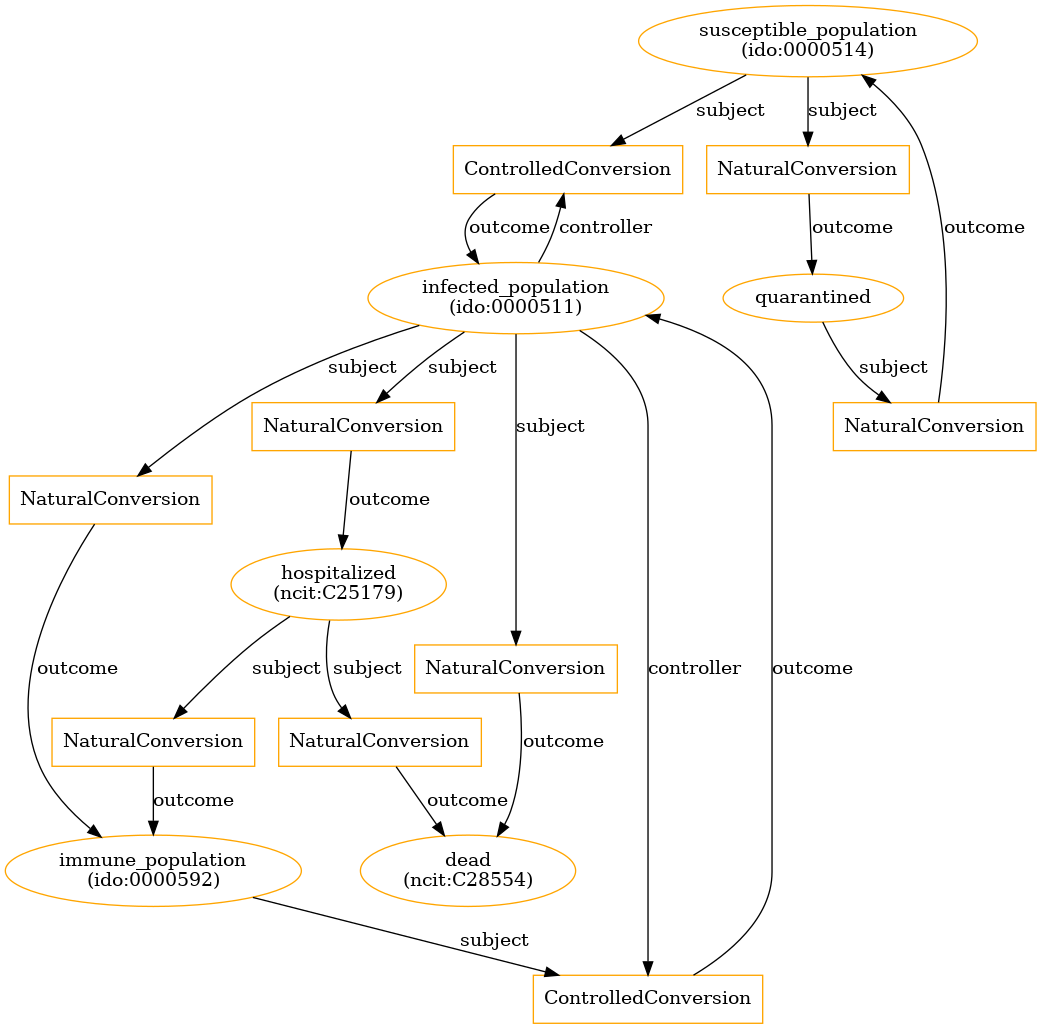

In [33]:
composed_model = compose(model_list)
composed_model.draw_jupyter()